In [7]:
import numpy as np
import matplotlib.pyplot as plot

In [8]:
a = 1
b = -1.4
c = 0.01
d = 0.11

# Двухмерное исходное изображение
def f2(x1, x2):
    return a*x1 + b*x2 + np.exp(c*x1 + d*x2)
## Частичная функция
def hx1(x, y):
    return c*np.exp(c*x + d*y) + a
def hx2(x, y):
    return d*np.exp(c*x + d*y) + b
 
x1 = 1
x2 = 0
alpha = 0.01
# Сохраняем точки, пройденные градиентным спуском
GD_X1 = [x1]
GD_X2 = [x2]
GD_Y = [f2(x1,x2)]
# Определить изменение y и количество итераций
y_change = f2(x1,x2)
iter_num = 1

while(y_change > 1e-4 and iter_num < 10):
    tmp_x1 = x1 - alpha * hx1(x1,x2)
    tmp_x2 = x2 - alpha * hx2(x1,x2)
    tmp_y = f2(tmp_x1,tmp_x2)
    
    y_change = np.absolute(tmp_y - f2(x1,x2))
    x1 = tmp_x1
    x2 = tmp_x2
    GD_X1.append(x1)
    GD_X2.append(x2)
    GD_Y.append(tmp_y)
    iter_num += 1
print('Крайняя точка:', (x1, x2))
print('Экстремум:', f2(x1,x2))
# print(GD_X1)
# print(GD_X2)

Крайняя точка: (0.909086150300538, 0.11594765330591698)
Экстремум: 1.768844890284719


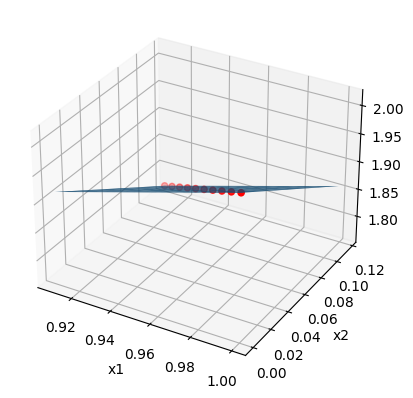

In [9]:
ax=plot.figure().add_subplot(111,projection='3d')
ax.scatter(GD_X1, GD_X2, GD_Y, c='r',marker='o')
x0=GD_X1
x1=GD_X2
# Создать матрицу сетки
x0,x1=np.meshgrid(x0,x1)
z=f2(x0, x1)
# Нарисуйте 3d картинку
ax.plot_surface(x0,x1,z)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f')
plot.show()